In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

import warnings

warnings.filterwarnings("ignore")

In [2]:
import functions_20221010

In [3]:
LABEL = 'Price'

booleans = []
floats = ['location.latitude', 'location.longitude', 'bedrooms', 'bathrooms', 'nearestStation']
categories = ['tenure.tenureType']

features = []
features.extend(booleans)
features.extend(floats)
features.extend(categories)
print(colored(f"features", "blue"), "-> ", features)

features.insert(0, LABEL)
print(colored(f"label", "red"), "-> ", LABEL)

features ->  ['location.latitude', 'location.longitude', 'bedrooms', 'bathrooms', 'nearestStation', 'tenure.tenureType']
label ->  Price


In [4]:
def get_source_dataframe(folder_prefix='../'):
    df = functions_20221010.get_combined_dataset(HOW='inner', early_duplicates=True, folder_prefix=folder_prefix)
    return df

In [5]:
functions_20221010.set_csv_directory('final_split')
df_orig = get_source_dataframe(folder_prefix='../../')
print(len(df_orig))

54201


In [6]:
df = functions_20221010.pre_tidy_dataset(df_orig, warnings=False)

In [7]:
df = df[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54067 entries, 14520525 to 126181118
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               54067 non-null  float64
 1   location.latitude   54067 non-null  object 
 2   location.longitude  54067 non-null  float64
 3   bedrooms            52265 non-null  float64
 4   bathrooms           50569 non-null  float64
 5   nearestStation      54067 non-null  float64
 6   tenure.tenureType   50413 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.3+ MB


In [8]:
print(len(df_orig))
old_length = len(df_orig)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

54201
54201 ==> 54067


<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    ACTION - Force location.latitude to be a float, rather than a string
</h2>
</div>

In [9]:
df['location.latitude'] = pd.to_numeric(df['location.latitude'], 'coerce').dropna().astype(float)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

54067 ==> 54067


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,54067.0,416448.380528,113505.624206,100000.000000,325000.000000,425000.000000,500000.000000,600000.000000
location.latitude,54057.0,51.496130,0.076650,51.298317,51.439070,51.499478,51.554067,51.683185
location.longitude,54067.0,-0.106239,0.718769,-0.498315,-0.212965,-0.105220,-0.012998,51.558746
bedrooms,52265.0,11.360145,2143.329175,1.000000,1.000000,2.000000,2.000000,490000.000000
bathrooms,50569.0,1.181534,0.413244,1.000000,1.000000,1.000000,1.000000,12.000000
nearestStation,54067.0,0.442075,1.049040,0.000000,0.221778,0.361208,0.553963,192.431869


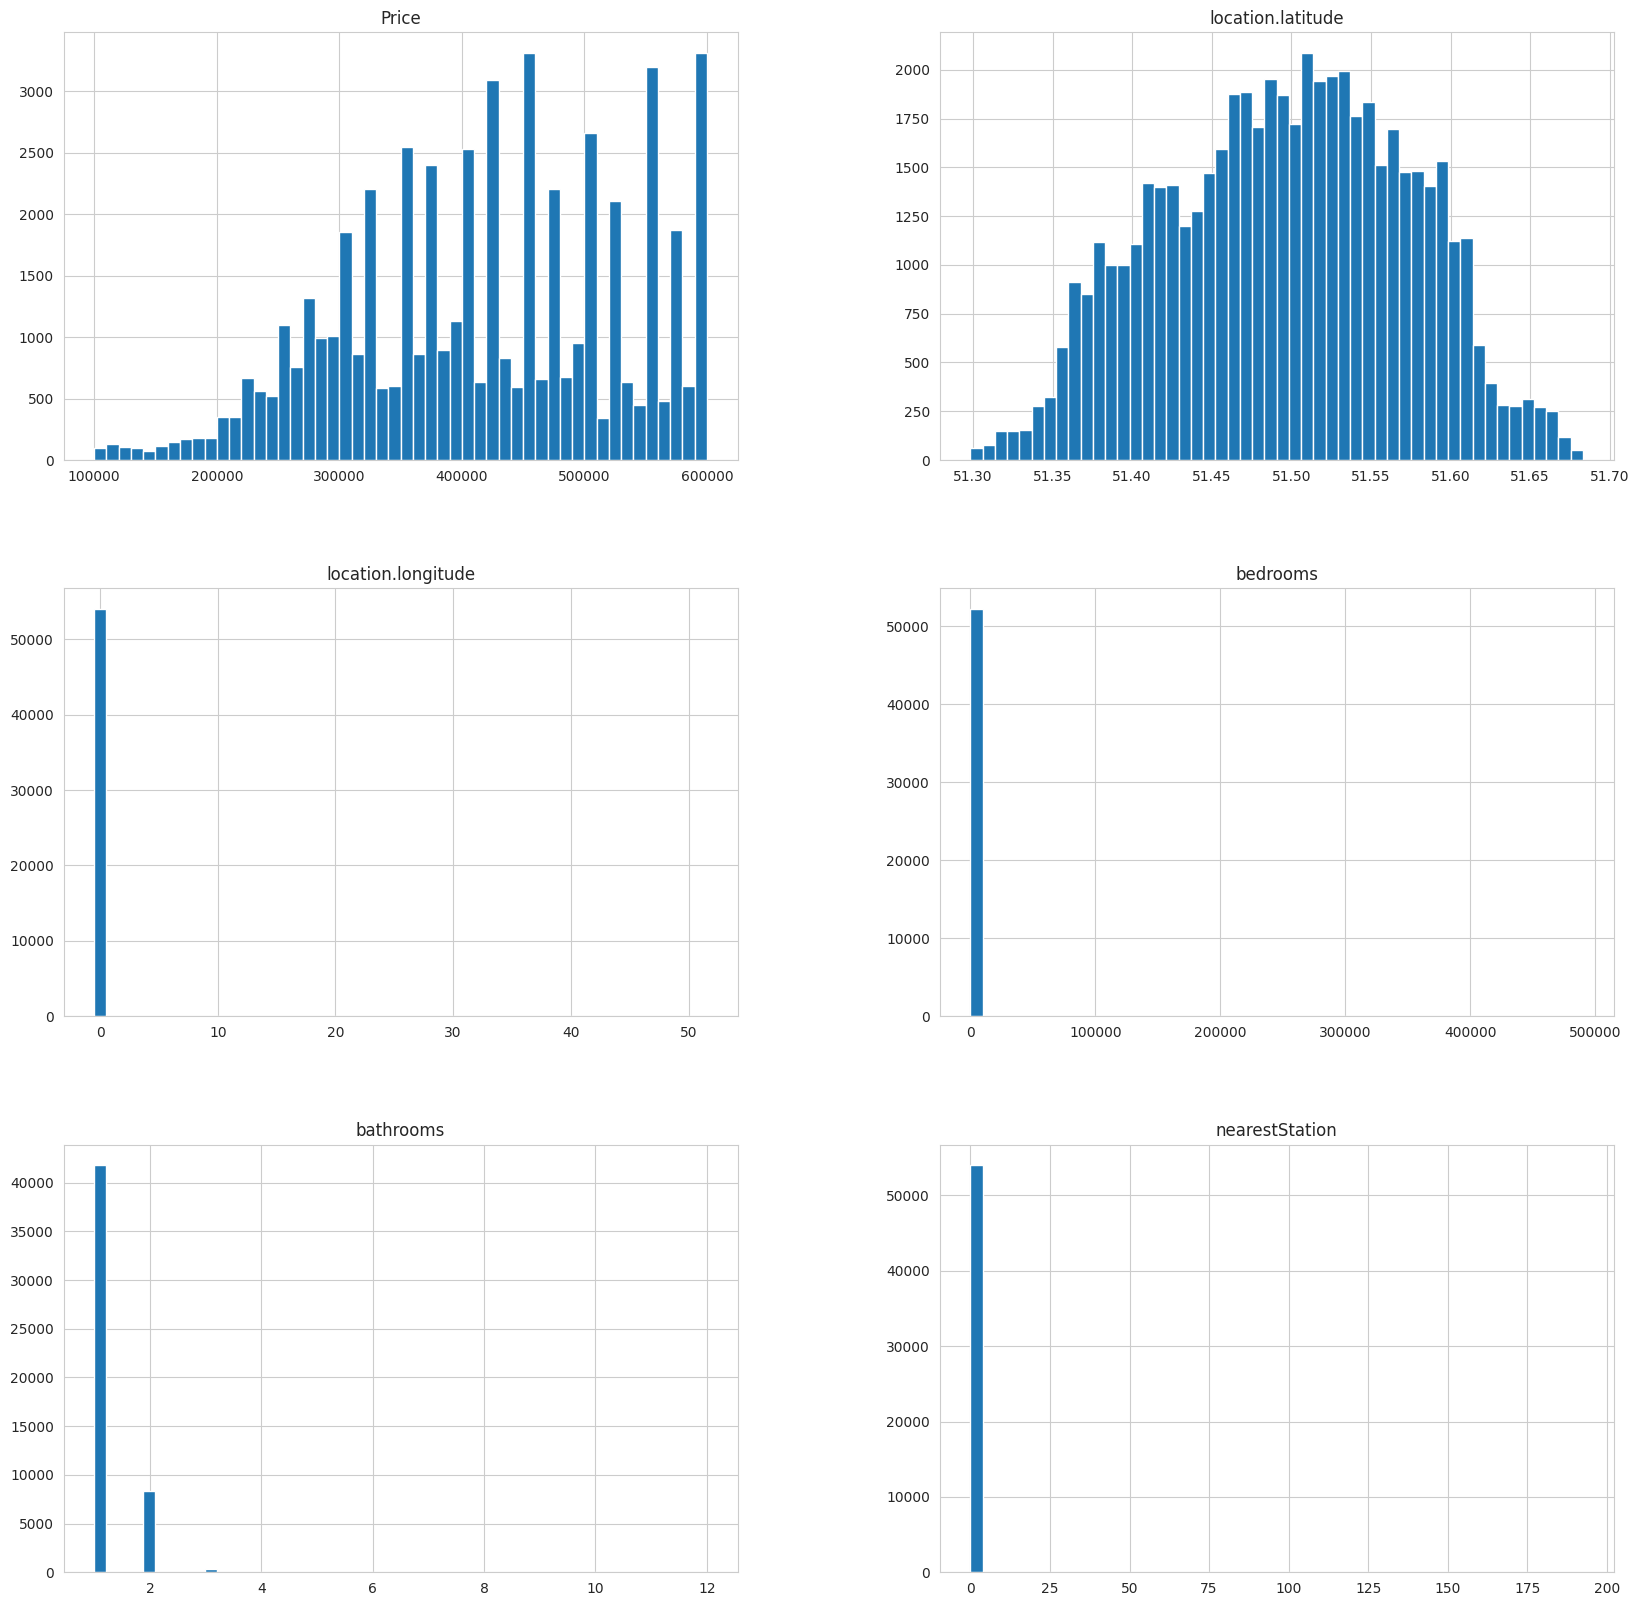

In [11]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,54067.0,416448.380528,113505.624206,100000.000000,325000.000000,425000.000000,500000.000000,600000.000000
location.latitude,54057.0,51.496130,0.076650,51.298317,51.439070,51.499478,51.554067,51.683185
location.longitude,54067.0,-0.106239,0.718769,-0.498315,-0.212965,-0.105220,-0.012998,51.558746
bedrooms,52265.0,11.360145,2143.329175,1.000000,1.000000,2.000000,2.000000,490000.000000
bathrooms,50569.0,1.181534,0.413244,1.000000,1.000000,1.000000,1.000000,12.000000
nearestStation,54067.0,0.442075,1.049040,0.000000,0.221778,0.361208,0.553963,192.431869


<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    IDENTIFY OUTLIERS


</h2>
</div>

In [13]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 5].sort_values('bedrooms',ascending=False)

,Price,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation,tenure.tenureType
125513798,490000.0,51.580290,-0.340270,490000.0,2.0,0.150384,LEASEHOLD
125880485,600000.0,51.440830,-0.038410,7.0,5.0,0.592204,FREEHOLD
125543333,550000.0,51.594000,0.160060,7.0,NaN,1.642956,FREEHOLD
119217689,525000.0,51.538560,0.118210,7.0,2.0,0.393151,FREEHOLD
124019570,600000.0,51.529453,0.184820,7.0,2.0,0.909304,FREEHOLD
84063621,600000.0,51.662239,-0.035894,6.0,2.0,0.525190,FREEHOLD
123811142,600000.0,51.474324,0.131402,6.0,1.0,0.758594,FREEHOLD
125568515,575000.0,51.527980,-0.461629,6.0,3.0,1.334739,FREEHOLD
125047877,525000.0,51.659081,-0.042710,6.0,3.0,0.592597,FREEHOLD
125000246,525000.0,51.489867,0.055150,6.0,2.0,0.118946,FREEHOLD


In [14]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 10].sort_values('bedrooms',ascending=False)

,Price,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation,tenure.tenureType
125513798,490000.0,51.58029,-0.34027,490000.0,2.0,0.150384,LEASEHOLD


In [15]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bathrooms'] > 5]

,Price,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation,tenure.tenureType
122875514,485000.0,51.400012,-0.062682,3.0,12.0,0.095729,FREEHOLD
123034523,365000.0,51.511447,0.012305,1.0,11.0,0.242776,NaN


In [16]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['location.longitude'] > 10]

,Price,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation,tenure.tenureType
117726977,250000.0,NaN,51.416213,NaN,NaN,0.204070,LEASEHOLD
118737587,600000.0,NaN,51.476357,4.0,2.0,0.559261,FREEHOLD
119410649,280000.0,NaN,51.558746,2.0,2.0,0.060633,LEASEHOLD
120572951,300000.0,NaN,51.400795,NaN,1.0,0.403894,FREEHOLD
121441124,300000.0,NaN,51.521018,NaN,NaN,0.141185,LEASEHOLD
122251739,400000.0,NaN,51.467950,3.0,2.0,0.352386,FREEHOLD
123704549,395000.0,NaN,51.470790,4.0,2.0,0.499003,FREEHOLD
124725866,395000.0,NaN,51.419006,NaN,NaN,0.346325,FREEHOLD
124725887,400000.0,NaN,51.475860,NaN,NaN,0.392091,FREEHOLD
124900562,220000.0,NaN,51.537886,NaN,NaN,0.549313,FREEHOLD


In [17]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 20]

,Price,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation,tenure.tenureType
105719081,224995.0,51.457055,-0.131578,3.0,2.0,192.431869,FREEHOLD
117858356,285000.0,51.461170,0.149245,2.0,NaN,40.309392,FREEHOLD
122768234,270000.0,51.427000,0.019000,3.0,2.0,119.325844,FREEHOLD


In [18]:
df = df[(df['location.longitude'] <= 10)]
df = df[(df['bedrooms'] <= 10)]
df = df[df['bathrooms'] <= 5]
df = df[(df['nearestStation'] <= 20)]

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

df.describe().T

54067 ==> 49016


,count,mean,std,min,25%,50%,75%,max
Price,49016.0,421205.709136,110831.099938,100000.000000,339950.000000,425000.000000,500000.000000,600000.000000
location.latitude,49016.0,51.496432,0.077345,51.298317,51.438138,51.499720,51.555650,51.683185
location.longitude,49016.0,-0.114267,0.156269,-0.498315,-0.211373,-0.103357,-0.011796,0.279726
bedrooms,49016.0,1.981394,0.824532,1.000000,1.000000,2.000000,2.000000,7.000000
bathrooms,49016.0,1.186674,0.413086,1.000000,1.000000,1.000000,1.000000,5.000000
nearestStation,49016.0,0.437429,0.353326,0.000000,0.224506,0.365045,0.556585,16.168861


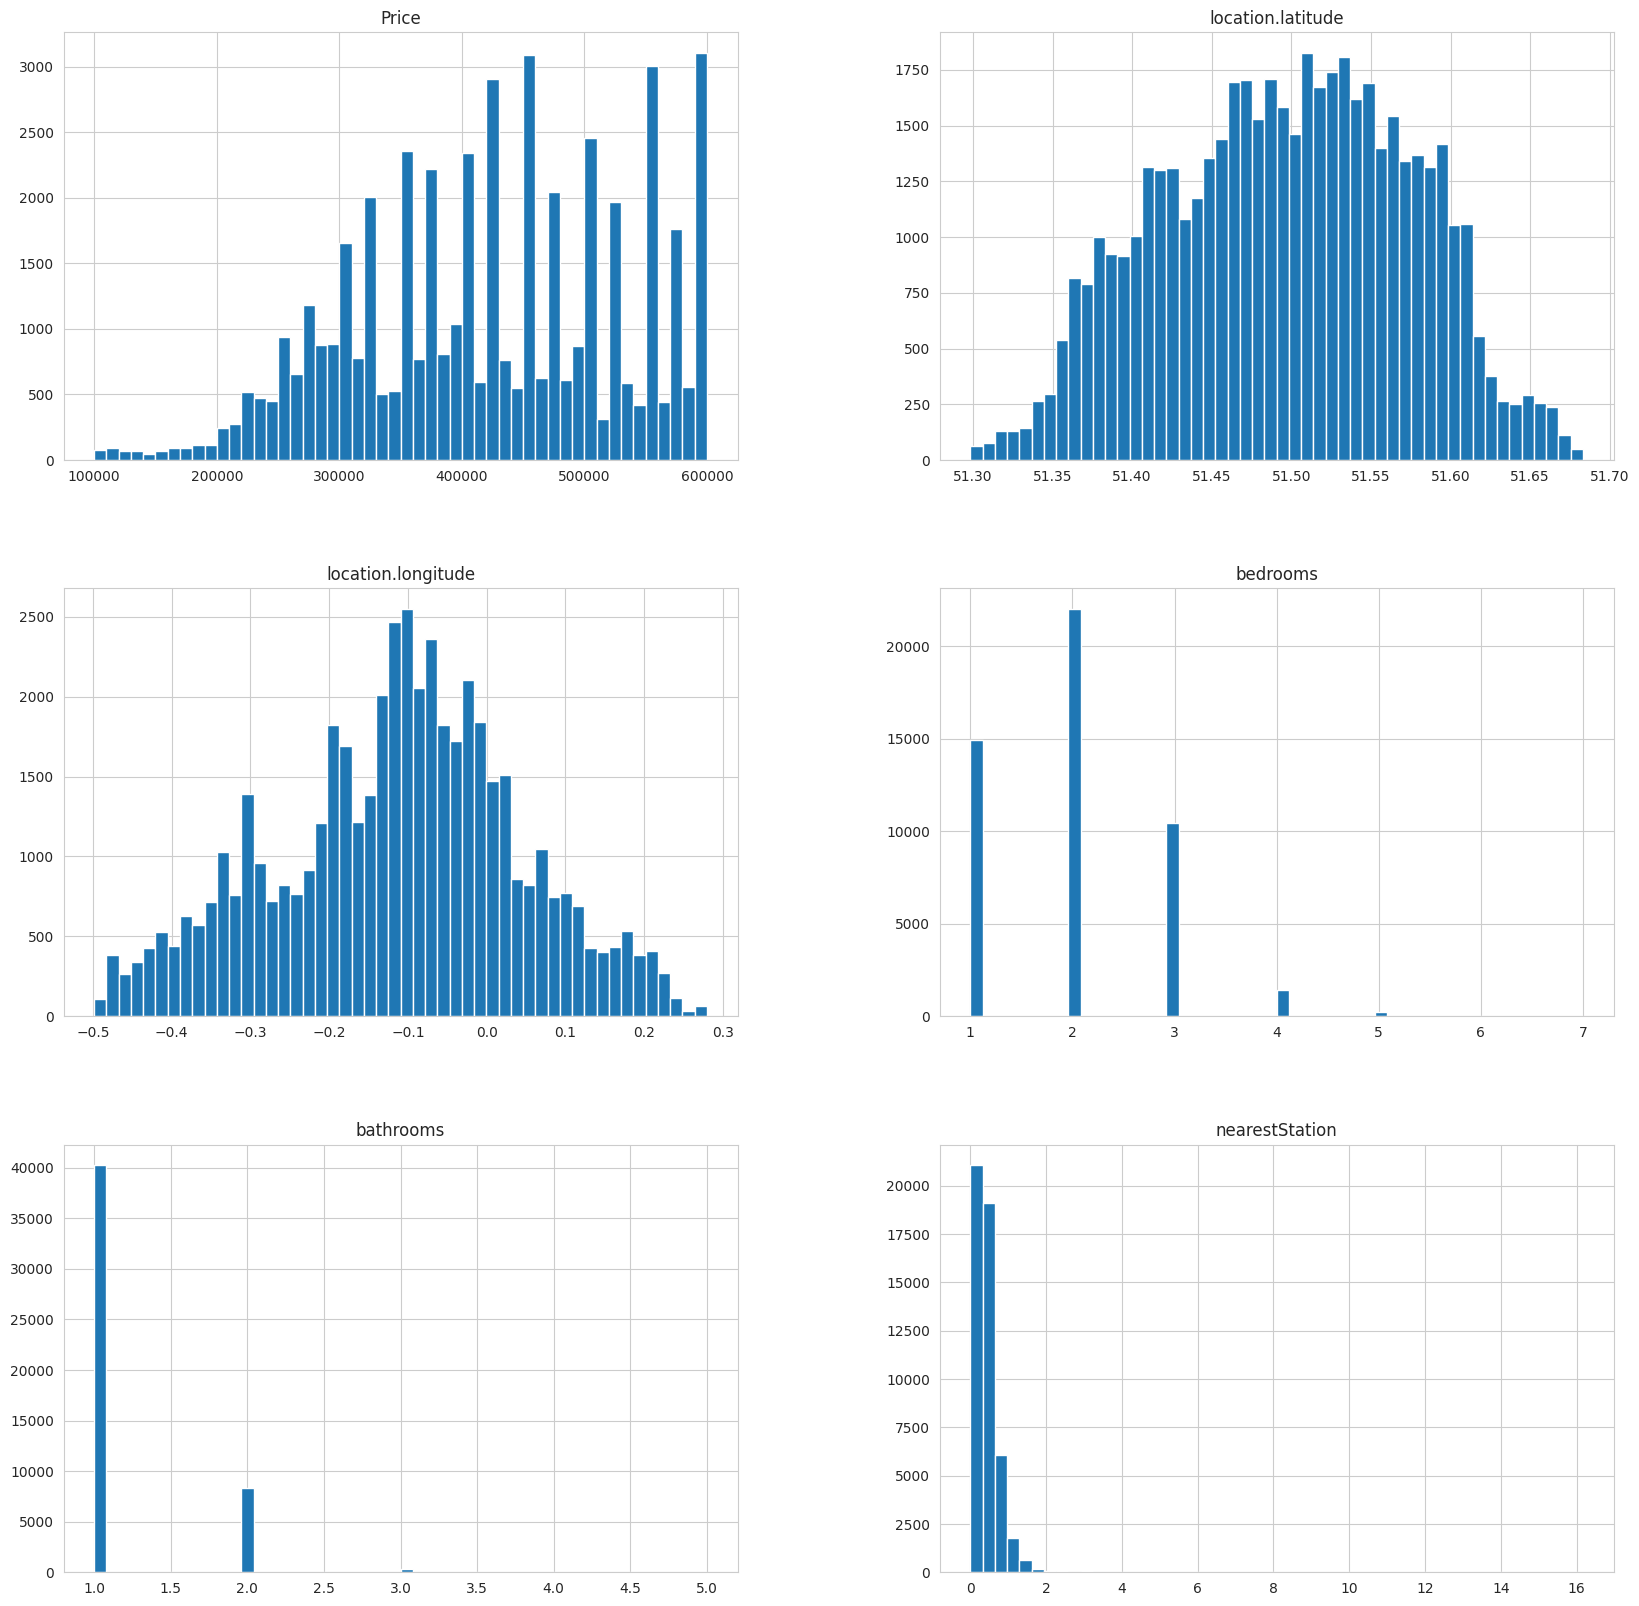

In [19]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [20]:
df.isna().sum()

Price                    0
location.latitude        0
location.longitude       0
bedrooms                 0
bathrooms                0
nearestStation           0
tenure.tenureType     2874
dtype: int64

In [21]:
df = df.dropna()
print(f"{old_length} ==> {len(df)}")
old_length = len(df)
df.describe()

49016 ==> 46142


,Price,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation
count,46142.000000,46142.000000,46142.000000,46142.000000,46142.000000,46142.000000
mean,421282.384335,51.496075,-0.114033,1.979953,1.185753,0.437174
std,110858.107656,0.077508,0.155650,0.823314,0.411915,0.352397
min,100000.000000,51.298317,-0.498315,1.000000,1.000000,0.000000
25%,339950.000000,51.437568,-0.211290,1.000000,1.000000,0.225159
50%,425000.000000,51.498427,-0.103070,2.000000,1.000000,0.365437
75%,500000.000000,51.555687,-0.012061,2.000000,1.000000,0.556509
max,600000.000000,51.683185,0.279726,7.000000,5.000000,16.168861


In [22]:
df_features = df.drop(LABEL, axis=1)
df_features

,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation,tenure.tenureType
14520525,51.529950,-0.207020,3.0,1.0,0.274316,LEASEHOLD
27953107,51.549390,-0.482600,2.0,2.0,0.305845,LEASEHOLD
33593487,51.447180,-0.338770,2.0,1.0,0.438045,FREEHOLD
35271294,51.449568,-0.140154,2.0,1.0,0.399307,LEASEHOLD
44749111,51.370050,-0.212410,2.0,1.0,0.410550,FREEHOLD
...,...,...,...,...,...,...
126179018,51.370651,-0.238346,2.0,1.0,0.682879,FREEHOLD
126179672,51.357170,-0.074740,3.0,2.0,0.545665,LEASEHOLD
126180107,51.531415,-0.052964,2.0,1.0,0.191407,LEASEHOLD
126180704,51.543141,0.011498,2.0,1.0,0.308609,LEASEHOLD


In [23]:
for column in categories:
    df_features = pd.concat([df_features, pd.get_dummies(df_features[column], prefix=column)], axis=1)
    df_features.drop([column], axis=1, inplace=True)  # now drop the original column (you don't need it anymore),

features_corr = df_features.corr()
features_corr

,location.latitude,location.longitude,bedrooms,bathrooms,nearestStation,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
location.latitude,1.000000,0.095506,0.003520,-0.004468,0.026540,0.001639,0.002635,0.025084,-0.041335
location.longitude,0.095506,1.000000,0.119280,0.017276,0.038873,0.005302,0.138167,-0.070736,-0.081684
bedrooms,0.003520,0.119280,1.000000,0.330318,0.219620,-0.003975,0.591644,-0.459230,-0.113850
bathrooms,-0.004468,0.017276,0.330318,1.000000,0.045828,-0.005555,0.083191,-0.035804,-0.059046
nearestStation,0.026540,0.038873,0.219620,0.045828,1.000000,-0.003568,0.281375,-0.202475,-0.078011
tenure.tenureType_COMMONHOLD,0.001639,0.005302,-0.003975,-0.005555,-0.003568,1.000000,-0.007299,-0.015796,-0.004507
tenure.tenureType_FREEHOLD,0.002635,0.138167,0.591644,0.083191,0.281375,-0.007299,1.000000,-0.759929,-0.216845
tenure.tenureType_LEASEHOLD,0.025084,-0.070736,-0.459230,-0.035804,-0.202475,-0.015796,-0.759929,1.000000,-0.469268
tenure.tenureType_SHARE_OF_FREEHOLD,-0.041335,-0.081684,-0.113850,-0.059046,-0.078011,-0.004507,-0.216845,-0.469268,1.000000


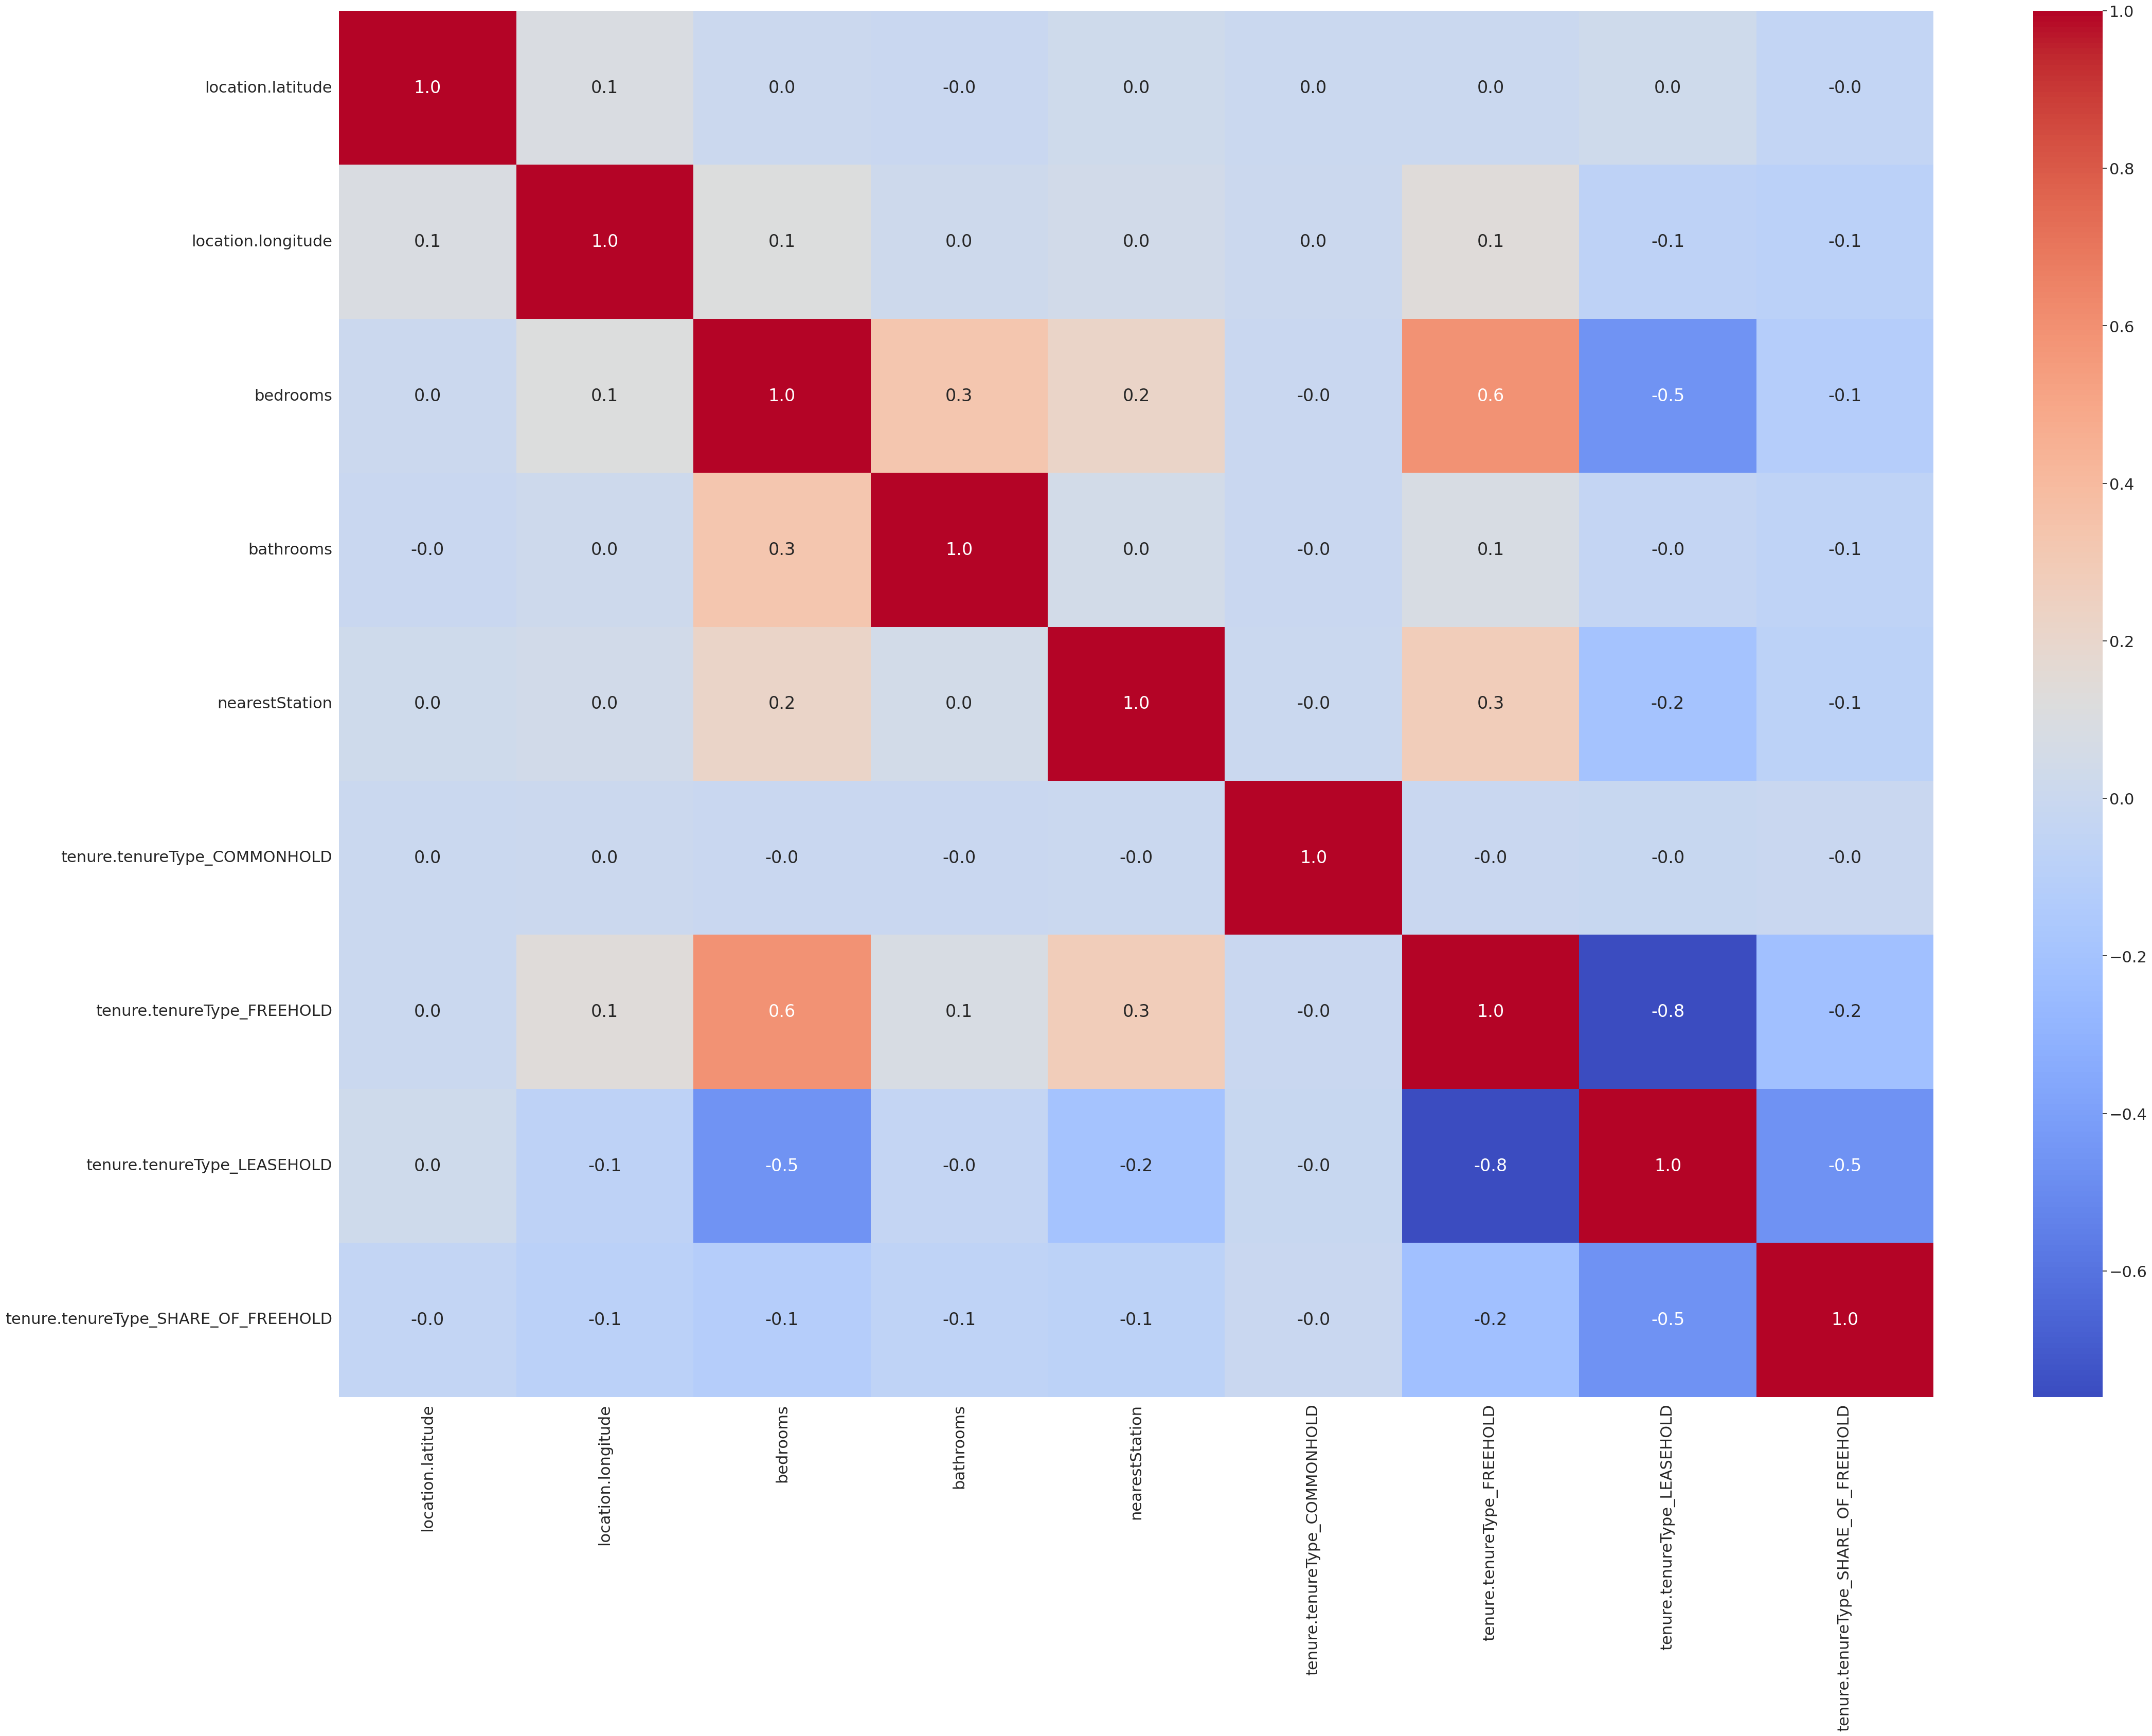

In [24]:
sns.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sns.heatmap(features_corr, annot=True, fmt='.1f', cmap='coolwarm')

In [25]:
data_corr = df.corr()
data_corr_dict = data_corr["Price"].sort_values(ascending=False).to_dict()
data_corr_dict

{'Price': 1.0,
 'bedrooms': 0.46527085641940874,
 'bathrooms': 0.2529910132814157,
 'location.latitude': 0.053816413219107094,
 'nearestStation': -0.014052633745796133,
 'location.longitude': -0.0635398802054931}

In [26]:
#print the most positively correlated features
pos_corr = {k: v for k, v in data_corr_dict.items() if v > 0.1 and v != 1}
pos_corr

{'bedrooms': 0.46527085641940874, 'bathrooms': 0.2529910132814157}

In [27]:
#print the most negatively correlated features
neg_corr = {k: v for k, v in data_corr_dict.items() if v < -0.1}
neg_corr

{}

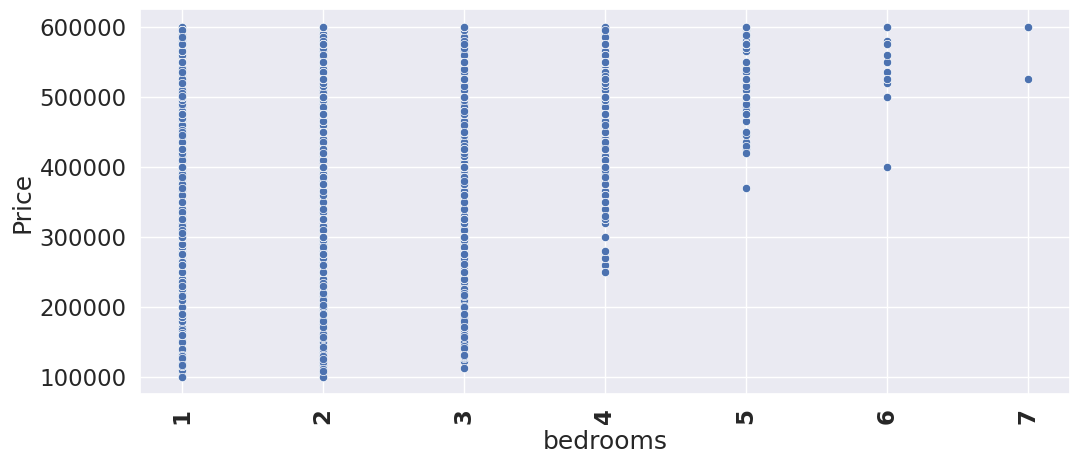

In [28]:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='Price', data=df)
plt.xticks(weight='bold', rotation=90)
plt.show()